<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

### Загрузить датасет по url:


In [2]:
# следующая строчка подключает сертификат для защищенного соединения
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

### Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


### Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

Исключим строки с незаполненными данными

In [5]:
df_1 = df.dropna()
df_1.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [6]:
freedom = df_1['Freedom']
positive_affect = df_1['Positive affect']

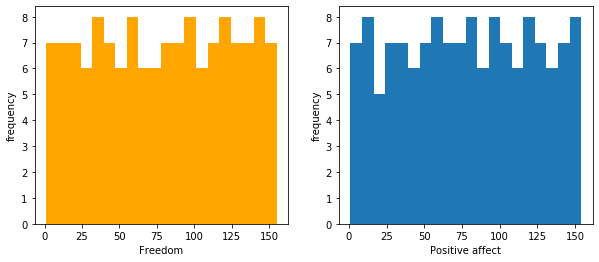

In [7]:
n_bins = 20
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax0, ax1 = axes.flatten()
ax0.hist(freedom, n_bins, histtype='bar', facecolor='orange', stacked=True)
ax1.hist(positive_affect, n_bins, histtype='bar', stacked=True)
ax0.set_xlabel('Freedom')
ax0.set_ylabel('frequency')
ax1.set_xlabel('Positive affect')
ax1.set_ylabel('frequency')
plt.show()

*Похоже на равномерное распределение*

### Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

**Медиана**

In [8]:
print('Медиана: ', statistics.median(freedom))

Медиана:  79.5


**Мода**

In [9]:
try:
    print('Значение моды: ', statistics.mode(freedom))
except:
    print('Значение моды нельзя вычислить.')

Значение моды нельзя вычислить.


**`Почему нельзя найти моду?`**

*Все значения колонки Freedom встречаются 1 раз, что видно из частотных графиков при высокой дискретизации (см. график ниже). Таким образом не может быть выделено наиболее часто встречающееся значение выборки.*

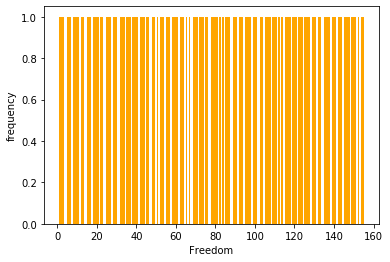

In [10]:
n_bins_1 = 200
plt.hist(freedom, n_bins_1, histtype='bar', facecolor='orange', stacked=True)
plt.xlabel('Freedom')
plt.ylabel('frequency')
plt.show()

**Математическое ожидание**

In [11]:
print('Математическое ожидание: ', statistics.mean(freedom))

Математическое ожидание:  78.82857142857142


**Стандартное отклонение**

In [12]:
statistics.pstdev(freedom)

44.9475794449399

**Дисперсия**

In [13]:
statistics.pvariance(freedom)

2020.2848979591836

**Минимум и максимум**

In [14]:
print(f'Минимум: {min(freedom)}; Максимум: {max(freedom)}')

Минимум: 1.0; Максимум: 155.0


**Выбросы**

- **Отсутствующие значения (были исключены при создании переменной freedom ранее).**

In [15]:
df['Freedom'].isnull().sum()

1

*Одно отсутствующее значение.*

- **"Сомнительные" значения**

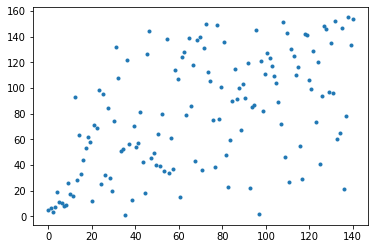

In [16]:
x = np.linspace(0, len(freedom), len(freedom))
plt.scatter(x, freedom, marker='.')

*Явно выраженных выбросов значений в выборке не наблюдается.*

**Размах**

In [17]:
freedom_range = max(freedom) - min(freedom)
print('Размах: ',freedom_range)

Размах:  154.0


### Посмотреть корреляцию между Freedom и positive affect (графически и математически). 
- **Графически с помощью plt.scatter и т.д.**

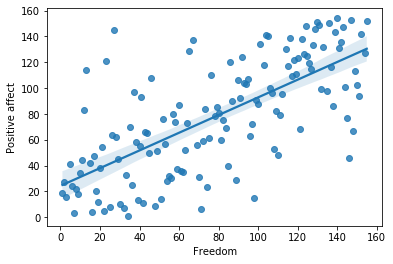

In [18]:
import seaborn as sns
sns.regplot('Freedom', 'Positive affect', data=df_1)

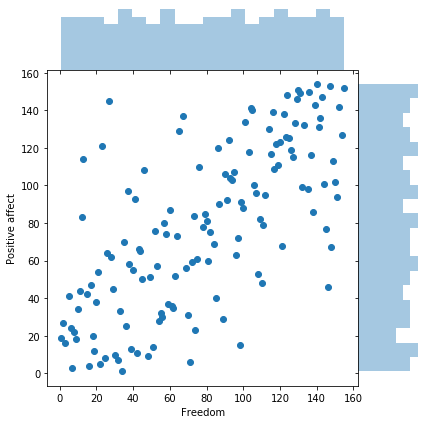

In [19]:
sns.jointplot('Freedom', 'Positive affect', data=df_1, kind = 'scatter', space=0, dropna=True, marginal_kws=dict(bins=n_bins))

- **математически через коэффициент Пирсона.**

In [20]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(freedom, positive_affect)
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: 0.6965670458090685


__`О чем говорит знак коэффициента?`__

*Значение коэффициента Пирсона указывает на прямопропорциональную неярко выраженную линейную зависимость между показателями Freedom и Positive Affect (положительное влияние Свободы на Измерение положительных эмоций).*

### Нормализовать данные колонки Freedom (централизация + масштабирование)

In [21]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df_1[['Freedom', 'Positive affect']])
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = ['Freedom', 'Positive affect']
df_norm.head()

,Freedom,Positive affect
0,-0.948052,-0.477124
1,-0.935065,-0.699346
2,-0.974026,-0.803922
3,-0.922078,-0.973856
4,-0.766234,-0.856209


**Проверка**

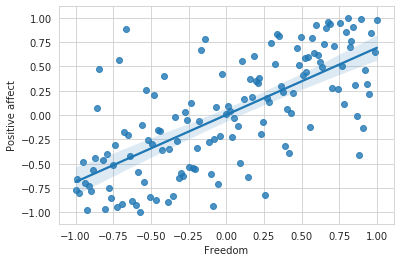

In [22]:
with sns.axes_style("whitegrid"):
    sns.regplot('Freedom', 'Positive affect', data=df_norm)

### Построить матрицу корреляций для всех колонок таблицы

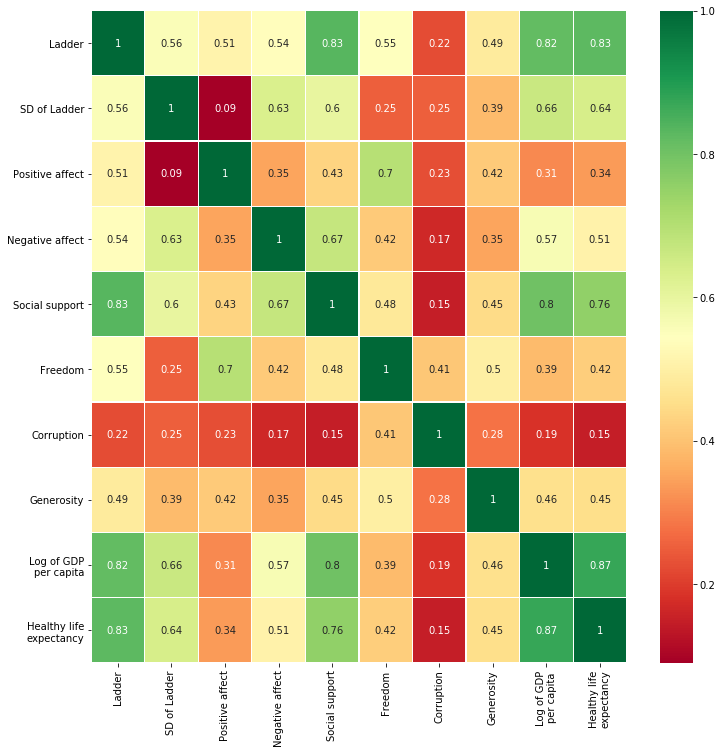

In [23]:
sns.heatmap(df_1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

### Загрузить таблицу цен на авокадо: 

In [24]:
df_2=pd.read_csv('avocado.csv')
df_2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [25]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [26]:
df_2 = df_2.drop('Unnamed: 0', axis=1)

In [27]:
df_2['Date'] = pd.to_datetime(df_2['Date'], format='%Y-%m-%d')
df_2.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [28]:
df_2.info()
# df_2['Date'][4].month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


### Сделать частотный график колонки AveragePrice. Какое это распределение?

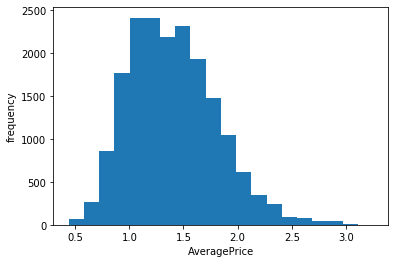

In [29]:
plt.hist(df_2['AveragePrice'], n_bins, histtype='bar', stacked=True)
plt.xlabel('AveragePrice')
plt.ylabel('frequency')
plt.show()

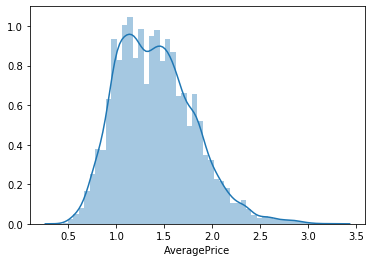

In [30]:
sns.distplot(df_2.AveragePrice)

*Нормальное распределение. Средняя цена (математическое ожидание) за авокадо 1,1...1,2 (наверное $, хотя единицы измерения не указаны).*

### Найти корреляцию в следующих колонках:

- колонкой 4046, 4225, 4770 и Average Price. Если корреляция есть (обратная или прямая), то какие выводы можно сделать?

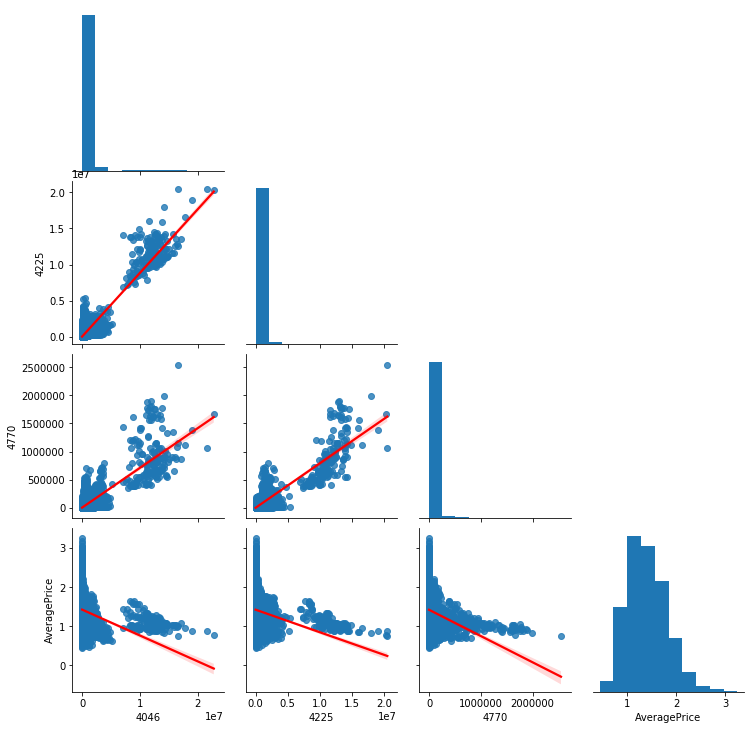

In [31]:
sns_plot = sns.pairplot(
    df_2[['4046', '4225', '4770', 'AveragePrice']], kind="reg", corner=True, 
    plot_kws ={'line_kws':{'color':'red'}})
sns_plot

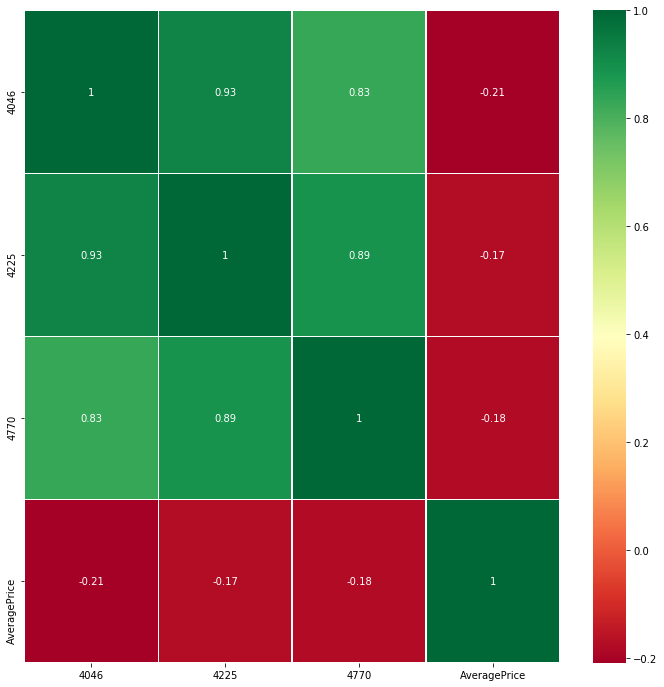

In [32]:
sns.heatmap(df_2[['4046', '4225', '4770', 'AveragePrice']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Графики и коэффициенты корреляции указывают на следующие тренды:
- наличие прямопропорциональной приближённой к линейной зависимости между продажами авокадо с кодом поиска продуктов (КПП) КПП 4046, 4225 и 4770 и средней ценой за авокадо(AveragePrice);
- наличие обратной зависимости между продажами авокадо по КПП 4046, 4225 и 4770 и средней ценой за авокадо. При этом отмечена низкая линейная зависимость между параметрами КПП 4046 и AveragePrice, 4225 и AveragePrice,  4770 и AveragePrice. С увеличением продаж наблюдается снижение средней цены за авокадо. При этом разброс цен при малых продажах существенно выше, чем при повышенных продажах.

__`В матрице корреляций элементами являются коэффициенты корреляции Пирсона?`__